In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv(r"E:\NRC_MODEL_DEV\Spam_Classifier_model\Dataset\emails.csv")

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [5]:
df.drop(columns=['Email No.'], inplace=True)
print("Missing Values:", df.isnull().sum().sum())
print("Spam Distribution:")
print(df['Prediction'].value_counts())

Missing Values: 0
Spam Distribution:
Prediction
0    3672
1    1500
Name: count, dtype: int64


In [6]:
sns.countplot(x=df['Prediction'])
plt.title("Spam vs Ham Count")
plt.show()


In [7]:
X = df.drop(columns=['Prediction'])
y = df['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


Logistic Regression Accuracy: 0.9652
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       739
           1       0.90      0.98      0.94       296

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



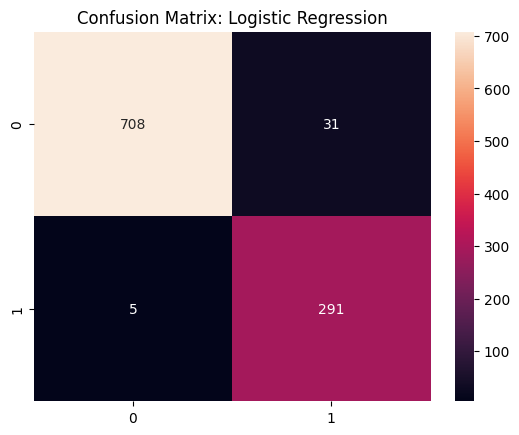

Random Forest Accuracy: 0.9807
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.97      0.97      0.97       296

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



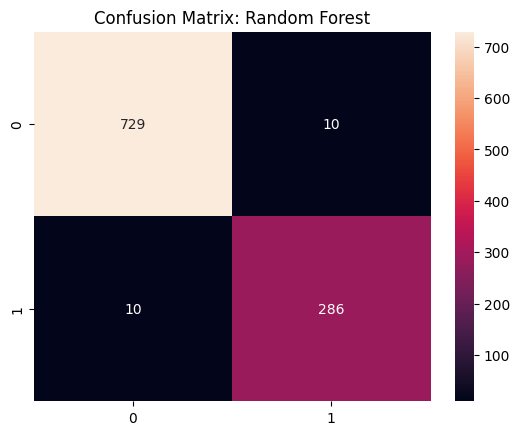

SVM Accuracy: 0.9469
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       739
           1       1.00      0.82      0.90       296

    accuracy                           0.95      1035
   macro avg       0.96      0.91      0.93      1035
weighted avg       0.95      0.95      0.95      1035



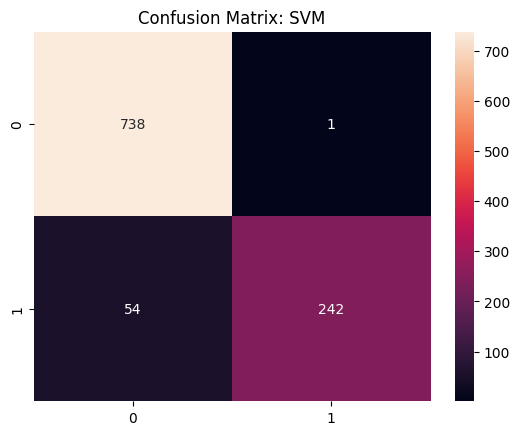

Naive Bayes Accuracy: 0.9304
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       739
           1       0.83      0.96      0.89       296

    accuracy                           0.93      1035
   macro avg       0.90      0.94      0.92      1035
weighted avg       0.94      0.93      0.93      1035



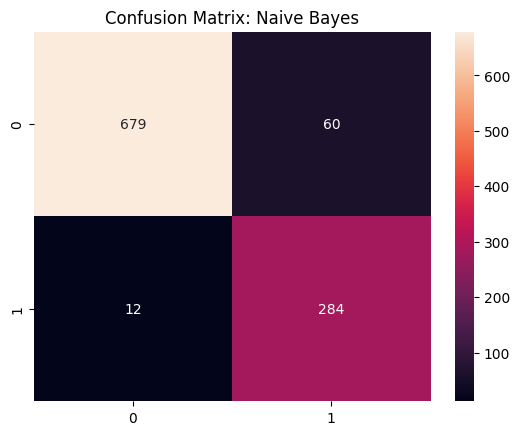

KNN Accuracy: 0.8454
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035



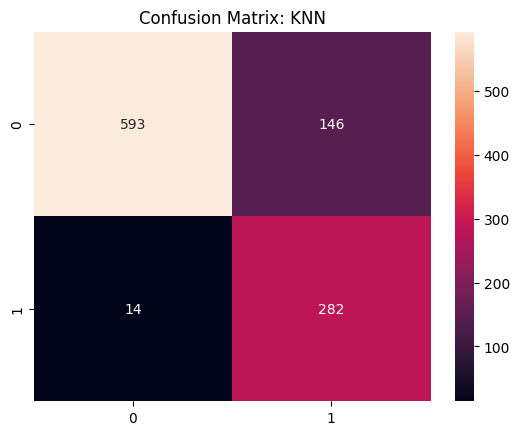

Decision Tree Accuracy: 0.9237
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       739
           1       0.87      0.86      0.87       296

    accuracy                           0.92      1035
   macro avg       0.91      0.91      0.91      1035
weighted avg       0.92      0.92      0.92      1035



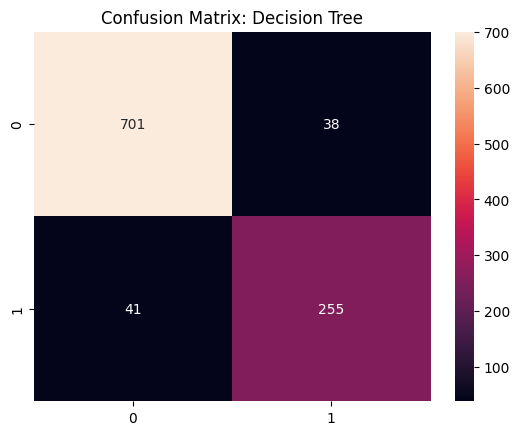

In [10]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
